In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.integrate import odeint

Set up the figure, axis, and the plot element we want to animate:

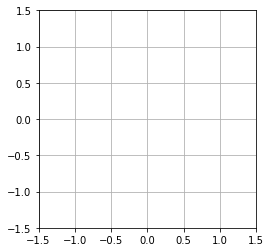

In [2]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))

ax.grid(True)

# Bob, string and text:
MyBob, = ax.plot([], [], "ro-", lw=2, zorder=2)
MyString, = ax.plot([], [], "k.-", lw=2, zorder=1)
MyText = ax.text(0, 0, '', transform=ax.transAxes)
# NOTE THE POSITION OF MyText!!!

Define the initialization function, which plots the background of each frame:

In [3]:
def init():
    MyBob.set_data([], [])
    MyString.set_data([], [])
    MyText.set_text('')
    return (MyBob, MyString, MyText)

Define the animation function, which is called for each new frame:

In [4]:
g = 9.8 #acceleration due to gravity.
L = 1.0 #length of string of pendulum.

In [5]:
def SimplePend(var, t, g, L):
    theta, omega = var
    dvar_dt = [omega, -(g/L)*np.sin(theta)]
    return dvar_dt

In [6]:
var0 = [1.+np.pi/2., 0.0] #IC of simple pendulum.

In [7]:
NumOfAnim = 101

In [8]:
t = np.linspace(0, 10, NumOfAnim)

In [9]:
%%time
sol = odeint(SimplePend, var0, t, args=(g, L))

CPU times: user 5.82 ms, sys: 257 µs, total: 6.08 ms
Wall time: 5.96 ms


In [10]:
def animate(i):
    
    x = np.cos(sol[i,0] - np.pi/2.)
    y = np.sin(sol[i,0] - np.pi/2.)
    
    xData = np.array([0, x])
    yData = np.array([0, y])
    
    MyBob.set_data(x, y)
    MyString.set_data(xData, yData)
    MyText.set_text('x={:.2f}, y={:.2f}'.format(x, y))
    
    return (MyBob, MyString, MyText)

Compile the animation. Setting ```blit=True``` will only redraw parts that have changed:

In [11]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, NumOfAnim),
                               interval=100,
                               blit=True, repeat=False)

In [12]:
%%time
HTML(anim.to_jshtml())

CPU times: user 6.93 s, sys: 184 ms, total: 7.11 s
Wall time: 7.58 s
